In [44]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from scipy.io import arff

In [45]:
# Step 2: Load the ARFF file and convert to a pandas DataFrame
data, meta = arff.loadarff(r"C:\Users\chara\Downloads\phpuZu33P.arff")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,b'1',b'0',b'0',b'0',b'1',b'0'
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,b'1',b'0',b'0',b'0',b'0',b'0'
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,b'1',b'0',b'0',b'0',b'0',b'0'
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,b'1',b'0',b'0',b'0',b'0',b'0'


In [46]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban'], dtype='object')


In [47]:
# One-hot encode categorical variables
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded.head())

      attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0  0.646467  0.666435  0.685047  0.699053  0.652746  0.407864  0.150309   
1  0.770156  0.767255  0.761053  0.745630  0.742231  0.688086  0.708416   
2  0.793984  0.772096  0.761820  0.762213  0.740569  0.734361  0.722677   
3  0.938563  0.949260  0.955621  0.966743  0.968649  0.869619  0.696925   
4  0.512130  0.524684  0.520020  0.504467  0.471209  0.417654  0.364292   

      attr8     attr9    attr10  ...  Sunset_b'0'  Sunset_b'1'  \
0  0.535193  0.555689  0.580782  ...         True        False   
1  0.757351  0.760633  0.740314  ...         True        False   
2  0.849128  0.839607  0.812746  ...         True        False   
3  0.953460  0.959631  0.966320  ...         True        False   
4  0.562266  0.588592  0.584449  ...         True        False   

   FallFoliage_b'0'  FallFoliage_b'1'  Field_b'0'  Field_b'1'  Mountain_b'0'  \
0              True             False        True       False          F

In [48]:
#splitting the data for training and testing dataset
from sklearn.model_selection import train_test_split

# Split the data into features and labels
features = df_encoded.drop(columns=['Beach_b\'0\'', 'Beach_b\'1\'', 'Sunset_b\'0\'', 'Sunset_b\'1\'', 'FallFoliage_b\'0\'', 'FallFoliage_b\'1\'', 'Field_b\'0\'', 'Field_b\'1\'', 'Mountain_b\'0\'', 'Mountain_b\'1\'', 'Urban_b\'0\'', 'Urban_b\'1\''])
labels = df_encoded[['Beach_b\'0\'', 'Beach_b\'1\'', 'Sunset_b\'0\'', 'Sunset_b\'1\'', 'FallFoliage_b\'0\'', 'FallFoliage_b\'1\'', 'Field_b\'0\'', 'Field_b\'1\'', 'Mountain_b\'0\'', 'Mountain_b\'1\'', 'Urban_b\'0\'', 'Urban_b\'1\'']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1925, 294) (482, 294) (1925, 12) (482, 12)


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Train the model.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [51]:
# Initialize lists to store metrics for each label
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop through each label
for i, label in enumerate(labels.columns):
    print(f"Metrics for {label}:")
    
    # Extract true and predicted labels for the current label
    y_test_label = y_test.iloc[:, i]
    y_pred_label = y_pred[:, i]
    
    # Accuracy
    accuracy = accuracy_score(y_test_label, y_pred_label)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Precision
    precision = precision_score(y_test_label, y_pred_label)
    precisions.append(precision)
    print(f"Precision: {precision:.2f}")
    
    # Recall
    recall = recall_score(y_test_label, y_pred_label)
    recalls.append(recall)
    print(f"Recall: {recall:.2f}")
    
    # F1 Score
    f1 = f1_score(y_test_label, y_pred_label)
    f1_scores.append(f1)
    print(f"F1 Score: {f1:.2f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test_label, y_pred_label)
    conf_matrices.append(conf_matrix)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

    
    

Metrics for Beach_b'0':
Accuracy: 0.90
Precision: 0.90
Recall: 0.99
F1 Score: 0.94
Confusion Matrix:
[[ 47  44]
 [  5 386]]


Metrics for Beach_b'1':
Accuracy: 0.89
Precision: 0.90
Recall: 0.48
F1 Score: 0.63
Confusion Matrix:
[[386   5]
 [ 47  44]]


Metrics for Sunset_b'0':
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[ 69  12]
 [  2 399]]


Metrics for Sunset_b'1':
Accuracy: 0.97
Precision: 0.97
Recall: 0.85
F1 Score: 0.91
Confusion Matrix:
[[399   2]
 [ 12  69]]


Metrics for FallFoliage_b'0':
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[ 75  18]
 [  2 387]]


Metrics for FallFoliage_b'1':
Accuracy: 0.96
Precision: 0.97
Recall: 0.80
F1 Score: 0.88
Confusion Matrix:
[[387   2]
 [ 19  74]]


Metrics for Field_b'0':
Accuracy: 0.95
Precision: 0.95
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[ 59  20]
 [  5 398]]


Metrics for Field_b'1':
Accuracy: 0.95
Precision: 0.94
Recall: 0.75
F1 Score: 0.83
Confusion Matrix:
[[3

In [52]:
# Assuming `y_test` are the true labels and `y_pred` are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


In [53]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.93


In [54]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.92


In [55]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.91


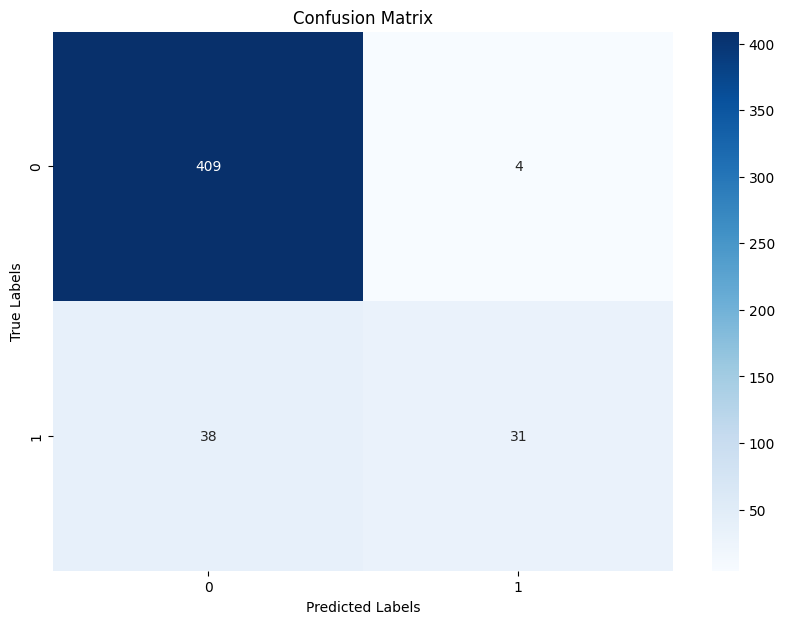

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.09568362149108793
R-squared: 0.3422813536208702


In [63]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.0538237  -0.03413018 -0.05441321 ... -0.07367115 -0.00221292
   0.15939495]
 [-0.0538237   0.03413018  0.05441321 ...  0.07367115  0.00221292
  -0.15939495]
 [-0.03776622  0.20569442 -0.08861299 ... -0.02216946 -0.02770703
  -0.06401507]
 ...
 [ 0.1646858   0.01267163 -0.37398072 ...  0.10338176 -0.07439326
   0.05617682]
 [ 0.11691188 -0.10571747 -0.0455424  ...  0.06884566 -0.05816607
   0.01581039]
 [-0.11691188  0.10571747  0.0455424  ... -0.06884566  0.05816607
  -0.01581039]]
Intercept: [ 0.86826041  0.13173959  0.57631419  0.42368581  1.38352065 -0.38352065
  1.39211993 -0.39211993  0.05154812  0.94845188  0.68626462  0.31373538]


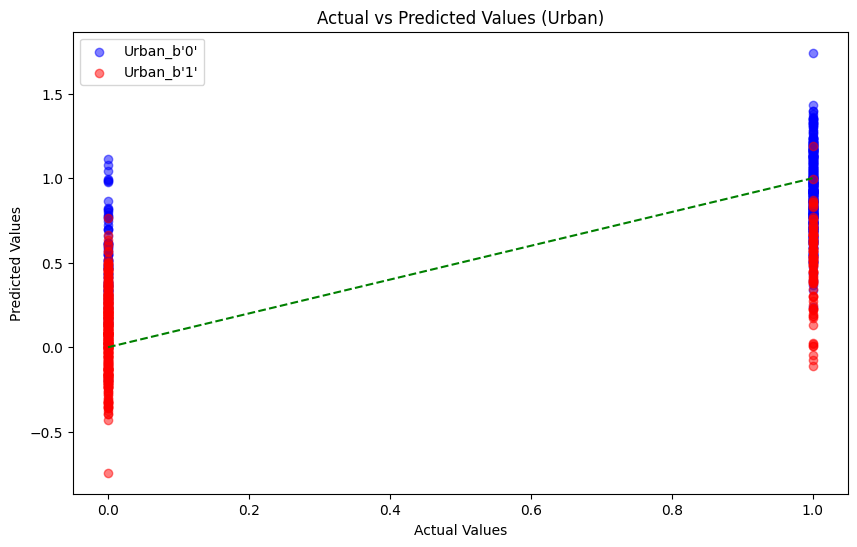

In [64]:
# Step 8: Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values[:, 0], y_pred[:, 0], color='blue', alpha=0.5, label='Urban_b\'0\'')
plt.scatter(y_test.values[:, 1], y_pred[:, 1], color='red', alpha=0.5, label='Urban_b\'1\'')
plt.plot([min(y_test.values.flatten()), max(y_test.values.flatten())], [min(y_test.values.flatten()), max(y_test.values.flatten())], color='green', linestyle='--')
plt.title('Actual vs Predicted Values (Urban)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

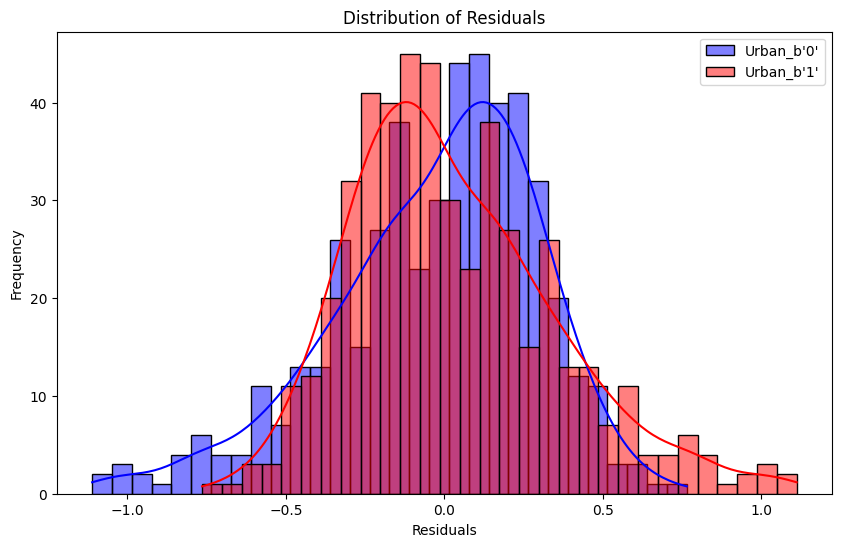

In [65]:
# Step 1: Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Step 2: Plot the distribution of residuals
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(residuals.values[:, 0], color='blue', label="Urban_b'0'", kde=True, bins=30)
sns.histplot(residuals.values[:, 1], color='red', label="Urban_b'1'", kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

